In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# feel free to add more if you need

Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HW4_data.csv to HW4_data (1).csv


In [ ]:
data = pd.read_csv("HW4_data.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Data Description

1. Customor Information: <br>
<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

2. Product Information <br>
<br>
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years <br>
MntMeatProducts: Amount spent on meat in last 2 years <br>
MntFishProducts: Amount spent on fish in last 2 years <br>
MntSweetProducts: Amount spent on sweets in last 2 years <br>
MntGoldProds: Amount spent on gold in last 2 years

3. Promotion Information: <br>
<br>
NumDealsPurchases: Number of purchases made with a discount <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Channel Information: <br>
<br>
NumWebPurchases: Number of purchases made through the company’s website <br>
NumCatalogPurchases: Number of purchases made using a catalogue <br>
NumStorePurchases: Number of purchases made directly in stores <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

A quick check on the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations: <br>
1. missing values found in income
2. Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
3. There are some categorical features in our data, will need to encode them.

In [ ]:
# Remove missing values
# since there are only a very small portion of data that is missing, we can simply remove them, but you are welcome to use other treatments.
data = data.dropna()
print("The total number of data points after removing the rows with missing values are:", len(data))

The total number of data points after removing the rows with missing values are: 2216


In [ ]:
# Convert Dt_Customer to DateTime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Store the new data in "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
# A quick check on the distribution of levels in categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


## Constuct the features
- wine comsuption: Wine spending ratio  
- RFM（Recency, Frequency, Monetary Value）model  
    - Total Purchases
    - Campaign Engagement
    - Channel Preferences
    - Recency


In [ ]:
# clean the missing values income
data['Income'].fillna(data['Income'].median(), inplace=True)

# clean the categorical variables
# Combine rare categories into a single "Other" category
data['Marital_Status'] = data['Marital_Status'].replace(
    {'YOLO': 'Other', 'Absurd': 'Other', 'Alone': 'Other'}
)

<ipython-input-8-4e56accdfa86>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


In [ ]:
# Wine comsumption
# Total Spending
data['Total_Spending'] = data[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].sum(axis=1)

# Wine Spending
data['Wine_Spending'] = data['MntWines']

# Wine Spending Ratio
data['Wine_Spending_Ratio'] = data['MntWines'] / data['Total_Spending']

#  if Total_Spending = 0, then Wine_Spending_Ratio = 0
data['Wine_Spending_Ratio'].fillna(0, inplace=True)

# check the distribution of the new variables
print(data[['Total_Spending', 'Wine_Spending', 'Wine_Spending_Ratio']].describe())

       Total_Spending  Wine_Spending  Wine_Spending_Ratio
count     2216.000000    2216.000000          2216.000000
mean       607.075361     305.091606             0.458699
std        602.900476     337.327920             0.228557
min          5.000000       0.000000             0.000000
25%         69.000000      24.000000             0.289506
50%        396.500000     174.500000             0.457822
75%       1048.000000     505.000000             0.641060
max       2525.000000    1493.000000             0.963303


<ipython-input-9-bf66795226e1>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Wine_Spending_Ratio'].fillna(0, inplace=True)


In [ ]:
def calculate_total_purchases(data):
    """
    Total Purchases
    """
    data['Total_Purchases'] = data[[
        'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases'
    ]].sum(axis=1)
    return data

def calculate_campaign_engagement(data):
    """
    Campaign Engagement
    """
    data['Campaign_Engagement'] = data[[
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
        'AcceptedCmp4', 'AcceptedCmp5'
    ]].sum(axis=1)
    return data

def calculate_channel_preferences(data):
    """
    Channel Preferences
    """
    data['Web_Preference'] = data['NumWebPurchases'] / data['Total_Purchases']
    data['Catalog_Preference'] = data['NumCatalogPurchases'] / data['Total_Purchases']
    data['Store_Preference'] = data['NumStorePurchases'] / data['Total_Purchases']

    # Total_Purchases=0, then all preferences = 0
    data.fillna(0, inplace=True)
    return data

def construct_all_features(data):
    """
    Construct all features
    """
    data = calculate_total_purchases(data)
    data = calculate_campaign_engagement(data)
    data = calculate_channel_preferences(data)
    return data

# assume that the new features are constructed based on the existing features
data = construct_all_features(data)

# check the distribution of the new variables
print(data[['Total_Spending', 'Total_Purchases', 'Campaign_Engagement',
            'Web_Preference', 'Catalog_Preference', 'Store_Preference', 'Recency']])

      Total_Spending  Total_Purchases  Campaign_Engagement  Web_Preference  \
0               1617               25                    0        0.320000   
1                 27                6                    0        0.166667   
2                776               21                    0        0.380952   
3                 53                8                    0        0.250000   
4                422               19                    0        0.263158   
...              ...              ...                  ...             ...   
2235            1341               18                    0        0.500000   
2236             444               22                    1        0.363636   
2237            1241               19                    1        0.105263   
2238             843               23                    0        0.260870   
2239             172               11                    0        0.272727   

      Catalog_Preference  Store_Preference  Recency  
0        

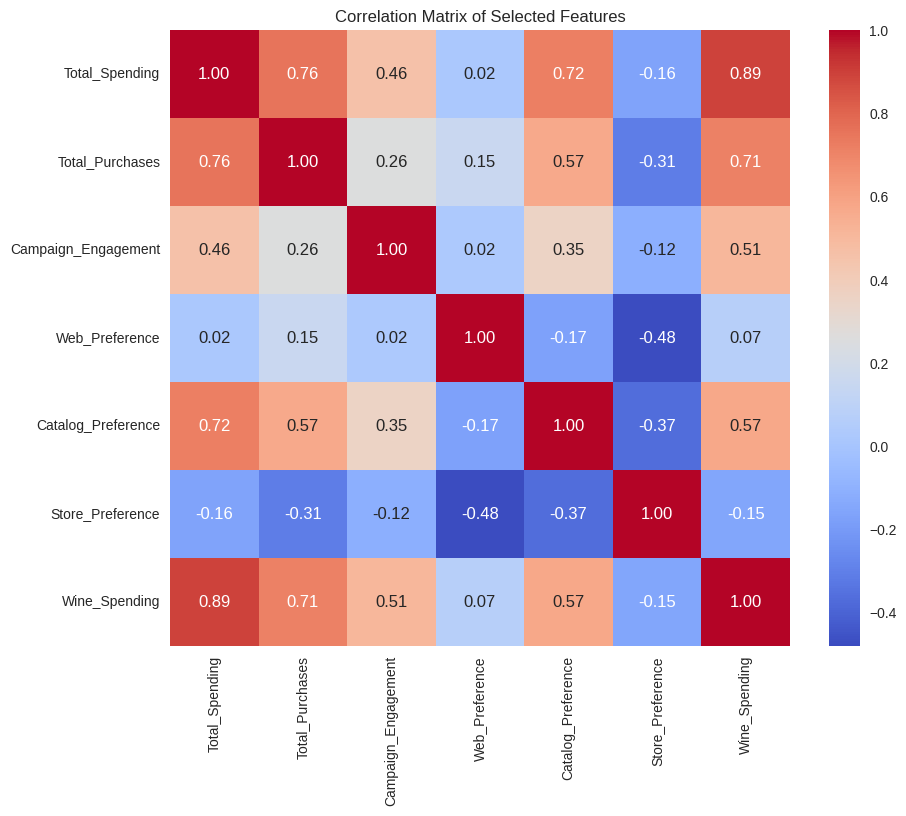

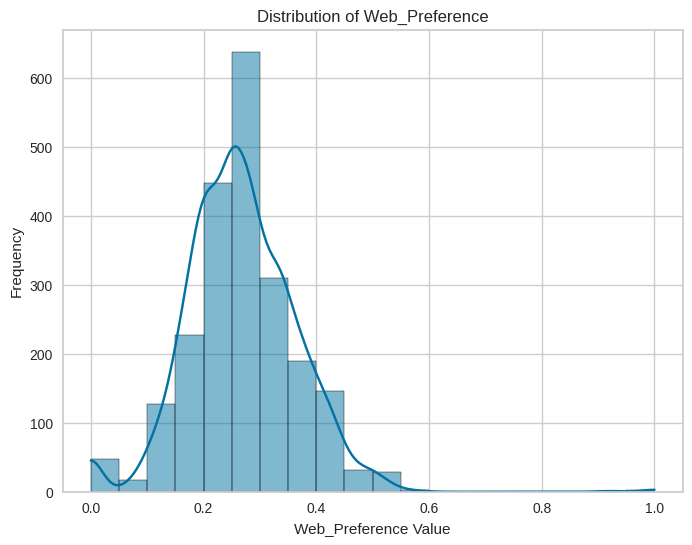

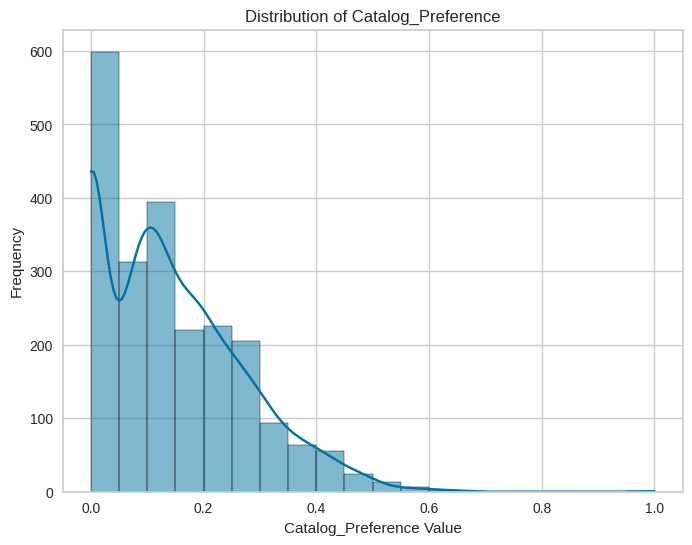

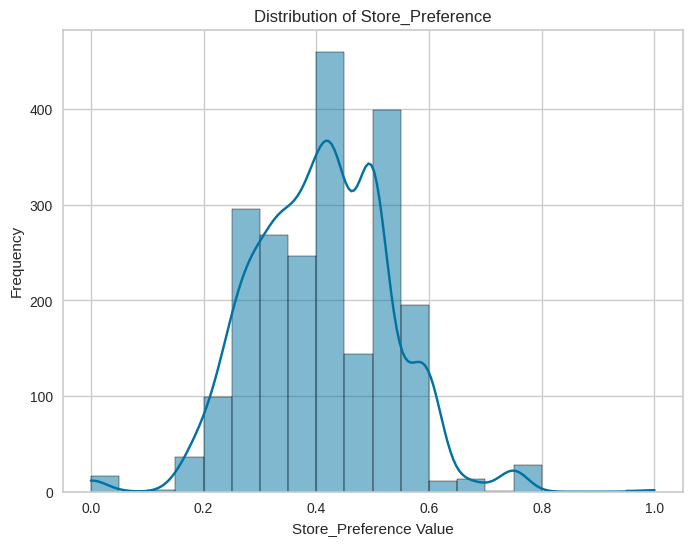

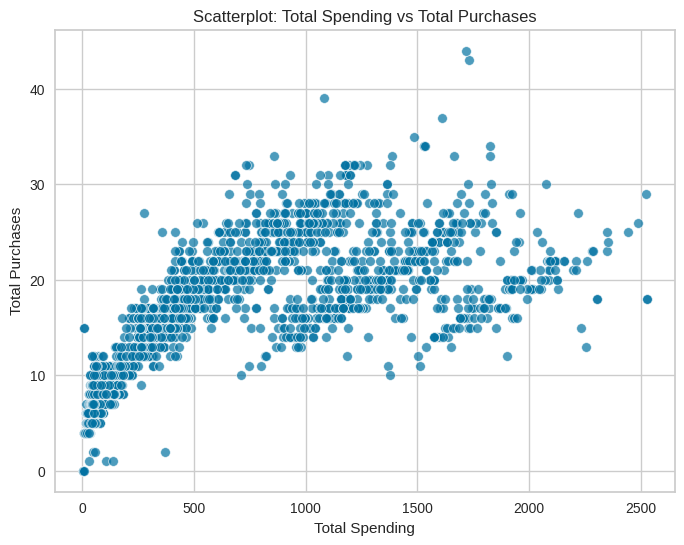

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection: Including wine spending as an additional feature
data['Wine_Spending'] = data['MntWines']

# Correlation Matrix: Analyze relationships between features
correlation_matrix = data[[
    'Total_Spending', 'Total_Purchases', 'Campaign_Engagement',
    'Web_Preference', 'Catalog_Preference', 'Store_Preference', 'Wine_Spending'
]].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Distribution of preferences across channels
preferences = ['Web_Preference', 'Catalog_Preference', 'Store_Preference']
for pref in preferences:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[pref], kde=True, bins=20)
    plt.title(f"Distribution of {pref}")
    plt.xlabel(f"{pref} Value")
    plt.ylabel("Frequency")
    plt.show()

# Scatterplot: Correlation between spending and purchases
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Total_Spending', y='Total_Purchases', alpha=0.7)
plt.title("Scatterplot: Total Spending vs Total Purchases")
plt.xlabel("Total Spending")
plt.ylabel("Total Purchases")
plt.show()

1.	Total_Spending:  
	•	Represents the total amount spent by the customer across all product categories.  
	•	Example: The first customer spent a total of $1617, indicating a high-value customer.  
2.	Total_Purchases:    
	•	Total number of purchases made by the customer across all sales channels.  
	•	Example: The first customer made 25 purchases.  
3.	Campaign_Engagement:  
	•	The total number of marketing campaigns the customer engaged with.  
	•	Example: Most customers have a value of 0, indicating no response to the campaigns.  
4.	Web_Preference, Catalog_Preference, Store_Preference:  
	•	The proportion of purchases made via the website, catalog, and store, respectively.  
	•	Example: The first customer made 32% of their purchases online, 40% via catalog, and 16% in stores.  
5.	Recency:  
	•	The number of days since the customer’s last purchase.  
	•	Example: The first customer’s most recent purchase was 58 days ago.  

## PCA

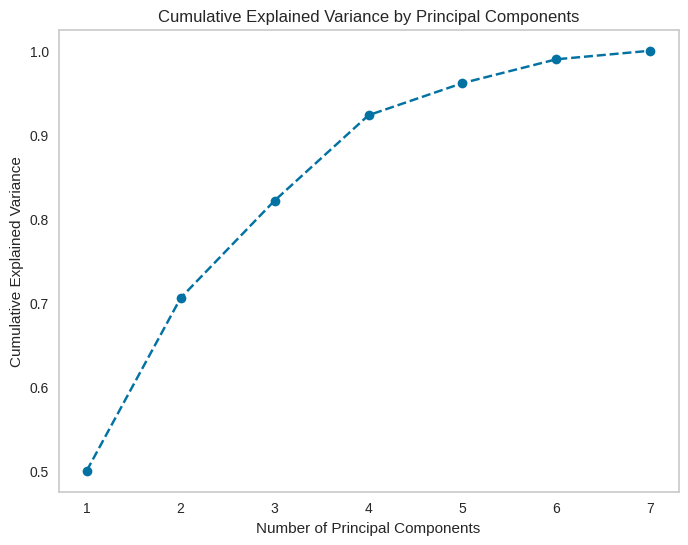

        PC1       PC2       PC3       PC4
0  3.080806  1.282323 -1.682070 -0.366388
1 -1.398606 -0.170567 -0.777763 -1.382993
2  0.329162  0.561754  0.210159  1.465563
3 -2.054048 -0.270040  0.327861  0.221564
4 -0.026873  0.624071 -0.782159 -0.204470


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


# Selecting features for PCA
features_for_pca = [
    'Total_Spending', 'Total_Purchases', 'Campaign_Engagement',
    'Web_Preference', 'Catalog_Preference', 'Store_Preference', 'MntWines'
]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_pca])

# Apply PCA
pca = PCA()
pca_result = pca.fit(scaled_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Select the first 4 principal components based on explained variance
pca_selected = PCA(n_components=4)
pca_transformed = pca_selected.fit_transform(scaled_data)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(4)])

# Save PCA-transformed data
pca_df.to_csv("pca_transformed_data.csv", index=False)

# Display a summary of the PCA-transformed data
print(pca_df.head())

1.	Reduced Dimensions:  
	•	The dataset has been reduced from the original 7 features to 4 principal components, retaining most of the original variance (~92%).  
2.	Principal Component Values:  
	•	Each value in the table is a score for that customer along a principal component axis. For example:  
	•	Row 0 (PC1 = 3.08) indicates that this customer is heavily weighted on the first principal component, which likely represents overall spending or a key behavior pattern.  
	•	Row 3 (PC1 = -2.05) shows a negative relationship with PC1, meaning this customer’s behavior contrasts with the dominant pattern in PC1.  
3.	Uncorrelated Features:  
	•	These components are orthogonal (uncorrelated) to each other, meaning they represent distinct dimensions of customer behavior.  

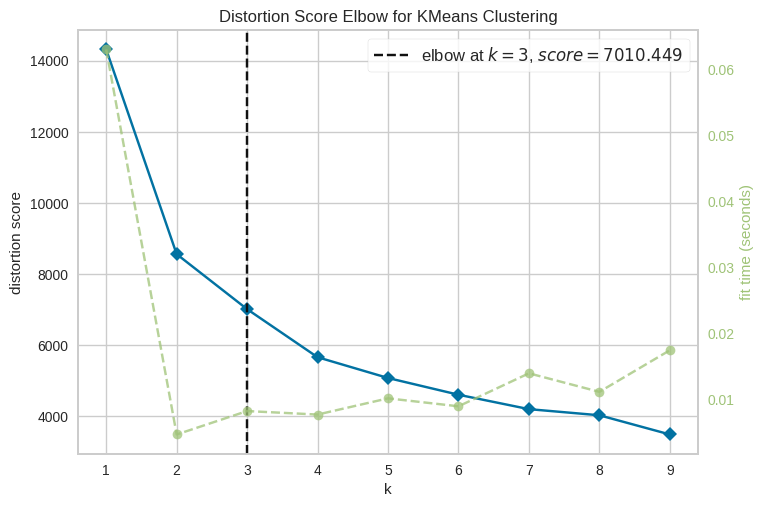

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...       Customer_For  \
0            0  2012-09-04       58       635  ...  5728320000

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(pca_df)
visualizer.show()

kmeans = KMeans(n_clusters=3)  # We found 3 to be optimal
kmeans.fit(pca_df)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
pca_df['Cluster'] = labels
data['Cluster'] = labels
print(data)

In [ ]:
df_cluster_0 = data[data['Cluster']==0]
df_cluster_1 = data[data['Cluster']==1]
df_cluster_2 = data[data['Cluster']==2]
print('Cluster 0', df_cluster_0['Response'].value_counts()/len(df_cluster_0))
print('Cluster 1', df_cluster_1['Response'].value_counts()/len(df_cluster_1))
print('Cluster 2', df_cluster_2['Response'].value_counts()/len(df_cluster_2))
print('Cluster 0 Average number of purchases made with discount:', df_cluster_0['NumDealsPurchases'].mean())
print('Cluster 1 Average number of purchases made with discount:', df_cluster_1['NumDealsPurchases'].mean())
print('Cluster 2 Average number of purchases made with discount:', df_cluster_2['NumDealsPurchases'].mean())

Cluster 0 Response
0    0.912467
1    0.087533
Name: count, dtype: float64
Cluster 1 Response
0    0.863309
1    0.136691
Name: count, dtype: float64
Cluster 2 Response
0    0.521912
1    0.478088
Name: count, dtype: float64
Cluster 0 Average number of purchases made with discount: 2.121131741821397
Cluster 1 Average number of purchases made with discount: 2.8489208633093526
Cluster 2 Average number of purchases made with discount: 1.4900398406374502


In [ ]:
cluster_0_sales = (df_cluster_0['Response'].value_counts().get(1, 0) + df_cluster_0['AcceptedCmp1'].value_counts().get(1, 0) +
                   df_cluster_0['AcceptedCmp1'].value_counts().get(1, 0) + df_cluster_0['AcceptedCmp2'].value_counts().get(1, 0) +
                   df_cluster_0['AcceptedCmp3'].value_counts().get(1, 0) + df_cluster_0['AcceptedCmp4'].value_counts().get(1, 0) +
                   df_cluster_0['AcceptedCmp5'].value_counts().get(1, 0))
cluster_1_sales = (df_cluster_1['Response'].value_counts().get(1, 0) + df_cluster_1['AcceptedCmp1'].value_counts().get(1, 0) +
                   df_cluster_1['AcceptedCmp1'].value_counts().get(1, 0) + df_cluster_1['AcceptedCmp2'].value_counts().get(1, 0) +
                   df_cluster_1['AcceptedCmp3'].value_counts().get(1, 0) + df_cluster_1['AcceptedCmp4'].value_counts().get(1, 0) +
                   df_cluster_1['AcceptedCmp5'].value_counts().get(1, 0))
cluster_2_sales = (df_cluster_2['Response'].value_counts().get(1, 0) + df_cluster_2['AcceptedCmp1'].value_counts().get(1, 0) +
                   df_cluster_2['AcceptedCmp1'].value_counts().get(1, 0) + df_cluster_2['AcceptedCmp2'].value_counts().get(1, 0) +
                   df_cluster_2['AcceptedCmp3'].value_counts().get(1, 0) + df_cluster_2['AcceptedCmp4'].value_counts().get(1, 0))
                   #+ df_cluster_2['AcceptedCmp5'].value_counts().get(1, 0)) # This line might also raise KeyError
print('Cluster 0 total profit:', cluster_0_sales*3.67 - len(df_cluster_0)*3)
print('Cluster 1 total profit:', cluster_1_sales*3.67 - len(df_cluster_1)*3)
print('Cluster 2 total profit:', cluster_2_sales*3.67 - len(df_cluster_2)*3)
print('Cluster 0 profit per customer:', (cluster_0_sales*3.67 - len(df_cluster_0)*3)/len(df_cluster_0))
print('Cluster 1 profit per customer:', (cluster_1_sales*3.67 - len(df_cluster_1)*3)/len(df_cluster_1))
print('Cluster 2 profit per customer:', (cluster_2_sales*3.67 - len(df_cluster_2)*3)/len(df_cluster_2))
print('Cluster 0 reach:', len(df_cluster_0)/len(data))
print('Cluster 1 reach:', len(df_cluster_1)/len(data))
print('Cluster 2 reach:', len(df_cluster_2)/len(data))

Cluster 0 total profit: -2695.7
Cluster 1 total profit: -1518.44
Cluster 2 total profit: 1181.09
Cluster 0 profit per customer: -2.3834659593280283
Cluster 1 profit per customer: -1.8206714628297362
Cluster 2 profit per customer: 4.7055378486055774
Cluster 0 reach: 0.5103790613718412
Cluster 1 reach: 0.37635379061371843
Cluster 2 reach: 0.11326714801444043


## MODEL PREDICTIONS  ##

In [ ]:
uploaded2 = files.upload()  #reading the pca transformed data


Saving pca_transformed_data.csv to pca_transformed_data (2).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load data (assumes CSV format; replace 'your_data.csv' with the actual file name)
transformed_pca_data = pd.read_csv("pca_transformed_data.csv")

X = transformed_pca_data
y = data['Total_Purchases']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.2827027027027027
R-squared: 0.9204778718051101


Determining the Decision Rule.

In [ ]:
# Step 1: Define the costs and revenue
campaign_cost_per_customer = 3  # $3 per customer (6 calls x $0.50 per call)
profit_per_purchase = 3.67  # $3.67 profit per product sold

# Step 2: Calculate the profit threshold
profit_threshold = campaign_cost_per_customer / profit_per_purchase
print(f"Profit Threshold: {profit_threshold:.2f}")

# Step 3: Decision rule
# A customer is profitable if predicted purchases > profit_threshold
decision_rule = f"Target customers with predicted purchases > {profit_threshold:.2f}"
print(decision_rule)


Profit Threshold: 0.82
Target customers with predicted purchases > 0.82


This means customers need to make at least 0.82 purchases for the campaign to break even. By applying this rule, the campaign focuses only on customers who are likely to generate more revenue than the campaign's cost.

In [ ]:
# Apply the decision rule
profit_threshold = 0.82
invited_customers = y_pred > profit_threshold

# Calculate metrics for the decision rule
campaign_cost_per_customer = 3
profit_per_purchase = 3.67

# Calculate profit for the selected customers
expected_revenue = y_pred[invited_customers] * profit_per_purchase
campaign_cost = invited_customers.sum() * campaign_cost_per_customer
total_profit = expected_revenue.sum() - campaign_cost

# Profit per invited customer
profit_per_customer = total_profit / invited_customers.sum()

# Percentage of customers invited
percent_invited = (invited_customers.sum() / len(y_test)) * 100

print(f"Total Profit: ${total_profit:.2f}")
print(f"Profit per Invited Customer: ${profit_per_customer:.2f}")
print(f"Percentage of Customers Invited: {percent_invited:.2f}%")

Total Profit: $22951.51
Profit per Invited Customer: $51.69
Percentage of Customers Invited: 100.00%
